In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder


df = pd.read_csv("./hospitalizaciones_train.csv")

df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [3]:
display(df.info())

df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

None

Available Extra Rooms in Hospital        18
Department                                5
Ward_Facility_Code                        6
doctor_name                               9
staff_available                          11
patientid                            122394
Age                                      10
gender                                    3
Type of Admission                         3
Severity of Illness                       3
health_conditions                         6
Visitors with Patient                    28
Insurance                                 2
Admission_Deposit                    409682
Stay (in days)                           49
dtype: int64

Primero generamos la salida a partir de la columna 'Stay (in days)'

In [4]:
df['output'] = df['Stay (in days)'].map(lambda x: 1 if x > 8 else 0)
#df.drop(['Stay (in days)'], axis=1,inplace=True)



In [5]:
df.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193,0.622966
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618,0.484644
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000,0.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000,0.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000,1.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000,1.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000,1.000000


Ahora sabemos que la probabilidad de estar mas 8 dias interno es de 62% en general. Ahora revisamos las columnas con variables categoricas para definir como hacer el encode

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\2761478962.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_genders = df.groupby('gender').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
gender,,,,,,,
Female,3.706459,5.012714,62800.242690,3.480945,4698.253790,9.354842,56.203297
Male,3.456800,5.043745,63921.291507,3.750478,4788.816489,20.583543,78.834836
Other,3.461409,5.040742,63773.873694,3.726038,4806.188472,20.517856,78.695579


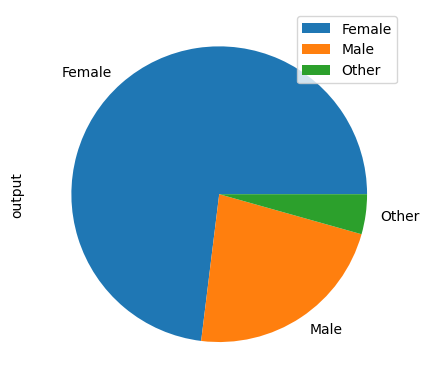

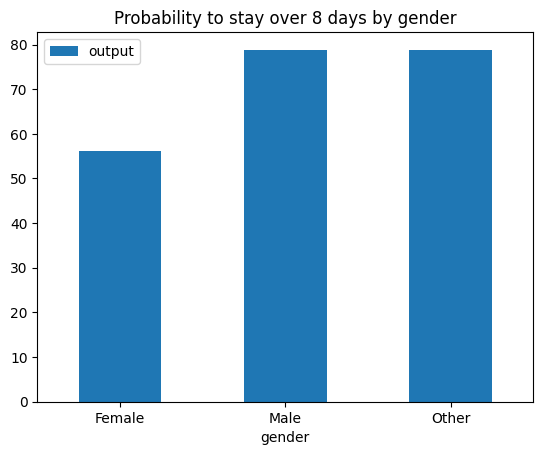

In [6]:
df_genders = df.groupby('gender').count()
df_genders.plot.pie(y='output')



df_genders = df.groupby('gender').mean()
df_genders['output'] = df_genders['output'] *100
display(df_genders.head(4))
axis = df_genders.plot.bar(y='output', rot=0, title= 'Probability to stay over 8 days by gender') #color={"Male": "red", "Female": "blue", "Other":"green"})

# Teniendo en cuenta que si afecta el genero en la probabilidad, vamos a generar un encoder one hot, con 'Female' como 0 y "Male" y "Other" como 1 
# pues tienen el mismo comportamiento en la variable objetivo

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1807628612.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_conditions = df.groupby('health_conditions').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
health_conditions,,,,,,,
Asthama,3.625625,5.039998,63073.998195,3.568395,4722.486164,12.373661,62.970969
Diabetes,3.631430,5.005657,62921.641671,3.541430,4724.780325,12.357767,61.842935
Heart disease,3.642706,5.046761,62626.913205,3.543492,4722.897223,12.311615,62.384156
High Blood Pressure,3.656228,5.021767,63097.136872,3.521197,4724.451746,12.395637,62.998330
None,3.638635,5.023148,63168.089416,3.577098,4719.912729,12.365673,61.762948
Other,3.640786,5.008604,63240.578235,3.535635,4728.438665,12.422136,62.539095


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Health Conditions'}, xlabel='health_conditions'>

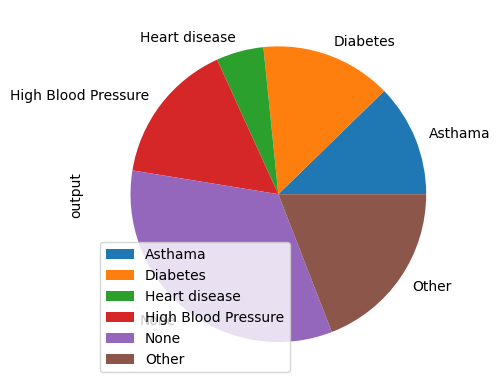

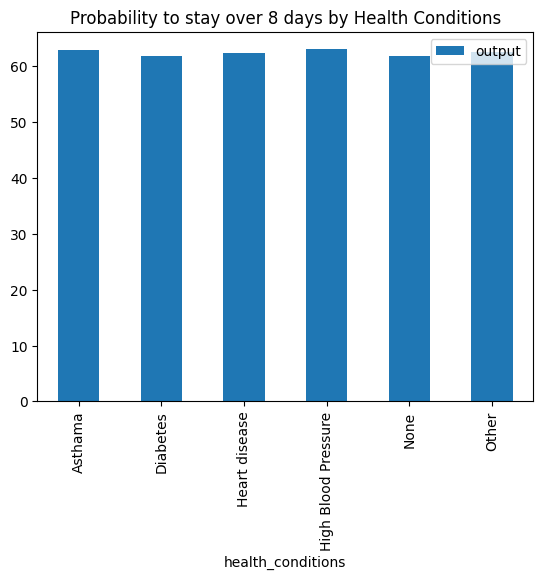

In [7]:
df_conditions = df.groupby('health_conditions').count()
df_conditions.plot.pie(y='output')

df_conditions = df.groupby('health_conditions').mean()
df_conditions['output'] = df_conditions['output']*100
display(df_conditions.head(6))
df_conditions.plot.bar(y='output', title='Probability to stay over 8 days by Health Conditions')

# Vemos que las condiciones de salud no tienen un impacto fuerte en en la variable objetivo

,Available Extra Rooms in Hospital,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),output
Department,,,,,,,,,,,,,,,
TB & Chest disease,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825,18825
anesthesia,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250,36250
gynecology,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625,281625
radiotherapy,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132,69132
surgery,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168,4168


C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1853765760.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_department = df.groupby('Department').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Department,,,,,,,
TB & Chest disease,3.544489,4.971952,63479.819708,4.127490,4797.014481,21.091687,96.504648
anesthesia,3.610786,4.972469,63690.752717,3.750676,4823.281949,27.511283,100.000000
gynecology,3.721626,5.011043,62736.730283,3.462750,4693.113901,8.635423,54.756858
radiotherapy,3.353613,5.019412,64154.746572,3.665842,4772.576583,16.212825,61.655963
surgery,3.498800,6.358445,62898.370921,3.418186,4754.835191,30.697697,99.952015


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Department'}, xlabel='Department'>

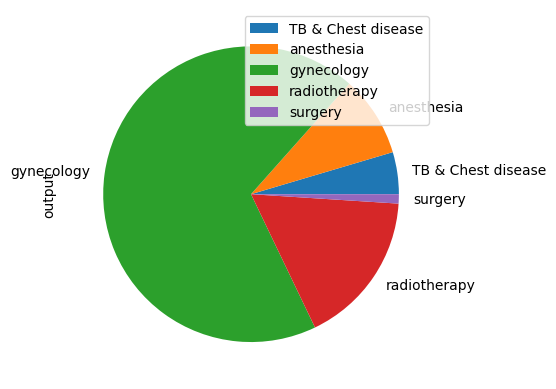

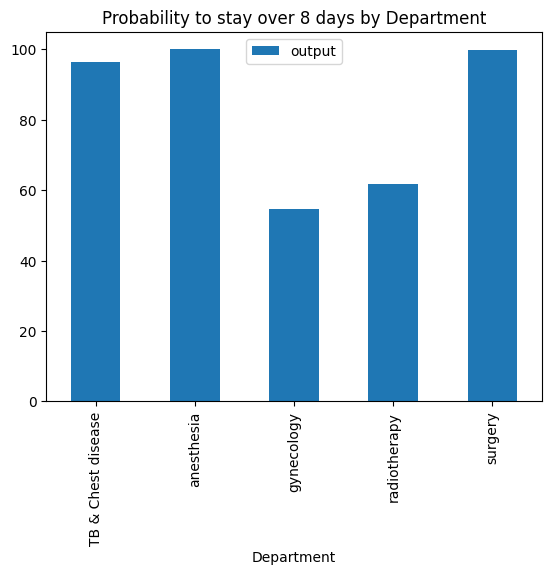

In [8]:
df_department = df.groupby('Department').count()
df_department.plot.pie(y='output')
display(df_department.head(5))

df_department = df.groupby('Department').mean()
df_department['output'] = df_department['output']*100
display(df_department.head(5))
df_department.plot.bar(y='output', title='Probability to stay over 8 days by Department')

# Observamos que si hay un impacto en la variable objetivo dependiendo del departamento. En este caso se usará un label encoder 
# y los valores se asignaran acorde a la probabilidad. 

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\2913089683.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ward = df.groupby('Ward_Facility_Code').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Ward_Facility_Code,,,,,,,
A,3.120564,5.154925,65306.311944,3.265964,4911.668974,22.494269,85.083220
B,3.378993,5.008947,64728.231872,3.196989,4738.808021,8.659725,56.208668
C,3.338989,4.976713,58736.024867,3.651198,4521.360979,20.302146,76.264138
D,3.951809,5.020410,62038.852121,3.657714,4550.465993,8.645302,55.262618
E,3.642867,4.997927,63980.560117,4.001011,4771.677989,19.701353,76.178349
F,3.790362,5.003629,61707.114497,3.499894,4794.163048,8.604748,53.007469


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Department'}, xlabel='Ward_Facility_Code'>

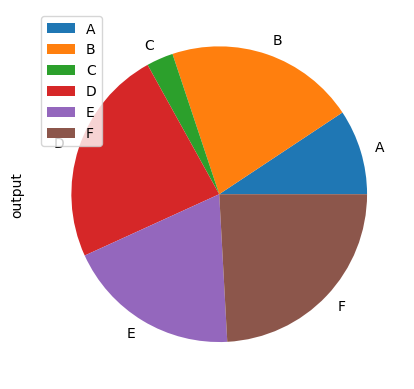

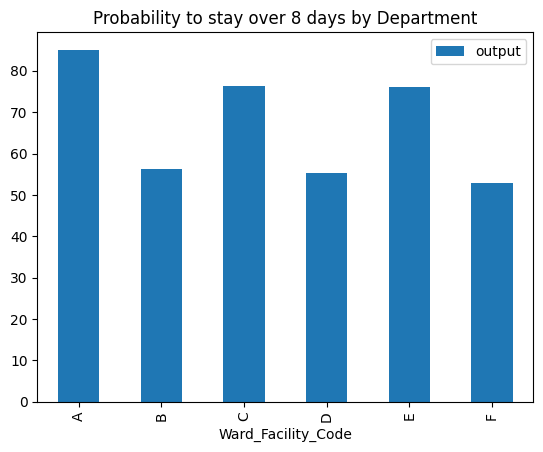

In [9]:
df_ward = df.groupby('Ward_Facility_Code').count()
df_ward.plot.pie(y='output')

df_ward = df.groupby('Ward_Facility_Code').mean()
df_ward['output'] = df_ward['output']*100
display(df_ward.head(6))
df_ward.plot.bar(y='output', title='Probability to stay over 8 days by Department')

# En este caso se observa que si hay un ligero impacto del departamento de admision. En este caso podemos usar un label encoder, ordenando por el promedio

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\3495482170.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = df.groupby('Age').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Age,,,,,,,
0-10,3.545950,5.084272,62546.505993,4.065746,4945.193201,27.205231,100.000000
11-20,3.549782,5.039037,62795.060501,3.362269,4744.502093,8.686643,56.683896
21-30,3.589296,5.011523,62771.322309,3.444630,4748.263907,10.650194,59.589422
31-40,3.900442,5.009506,62925.559566,3.619947,4657.283212,8.951026,50.834488
41-50,3.726858,5.029027,63637.021903,3.711715,4654.127923,9.050066,52.101617
51-60,3.250945,5.033440,63018.462471,3.563695,4817.916904,27.472847,100.000000
61-70,3.256095,5.038428,63828.482026,3.609063,4824.043951,27.117120,100.000000
71-80,3.288612,5.033346,63491.272686,3.508645,4867.177459,26.345554,100.000000
81-90,3.228362,5.086553,65082.124888,3.723570,4818.894262,26.231656,100.000000


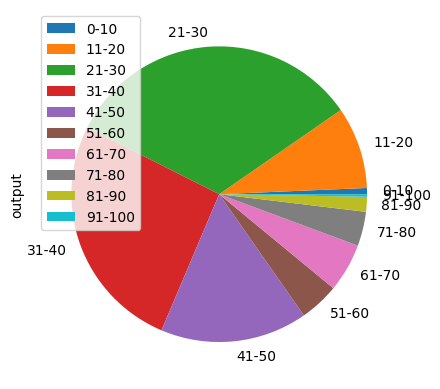

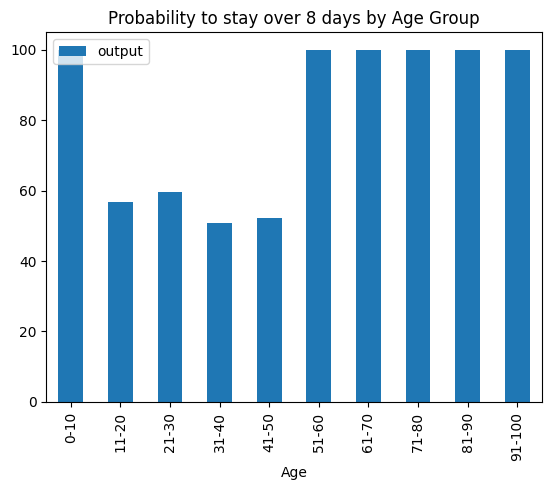

In [10]:
df_age = df.groupby('Age').count()
df_age.plot.pie(y='output')


df_age = df.groupby('Age').mean()
df_age['output'] = df_age['output']*100

df_age.plot.bar(y='output', title='Probability to stay over 8 days by Age Group')

df_age.head(20)
# En este caso se distingue una fuerte relacion en los rangos de edad y la variable objetivo. En este caso podemos re-categorizar a 3 variables,
#  menores de 10 años, entre 11 y 50, y mayores de 50

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1616145615.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_admision = df.groupby('Type of Admission').mean()


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Admision type'}, xlabel='Type of Admission'>

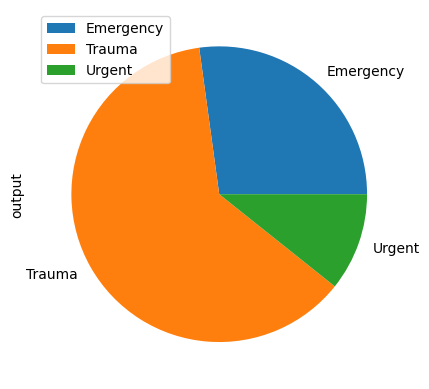

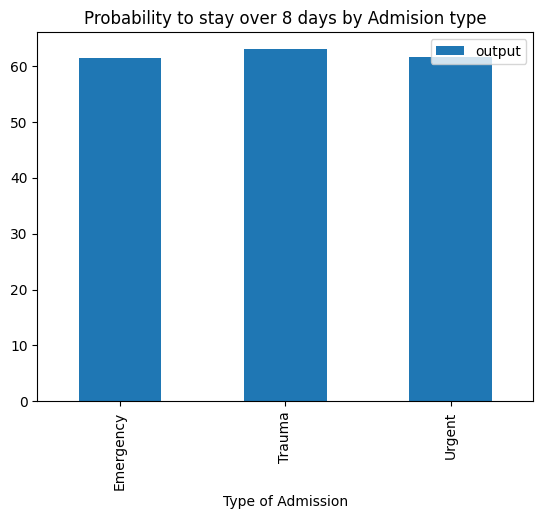

In [11]:
df_admision = df.groupby('Type of Admission').count()
df_admision.plot.pie(y='output')


df_admision = df.groupby('Type of Admission').mean()
df_admision['output'] = df_admision['output']*100

df_admision.plot.bar(y='output', title='Probability to stay over 8 days by Admision type')

# No hay una relacion fuerte entre la variable de salida y el tipo de admision. Podemos considerar descartar esta variable

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\3119536168.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_severity = df.groupby('Severity of Illness').mean()


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Severity of Ilness'}, xlabel='Severity of Illness'>

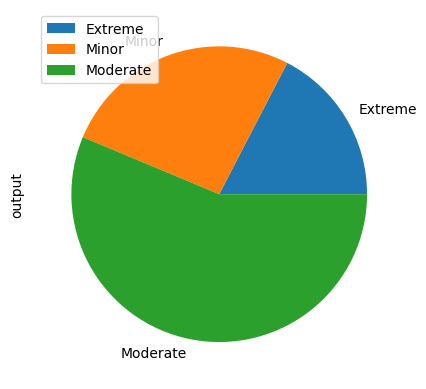

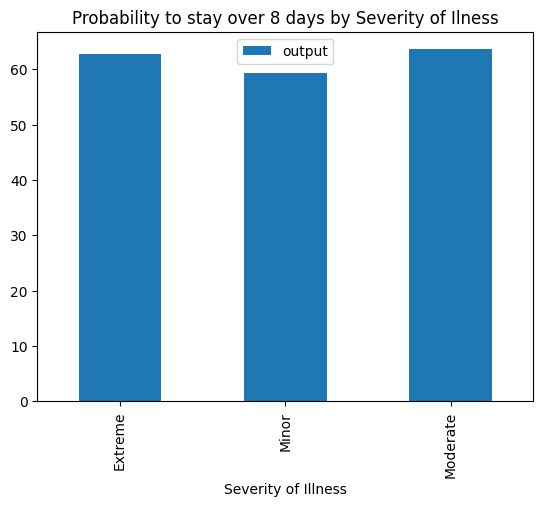

In [12]:
df_severity = df.groupby('Severity of Illness').count()
df_severity.plot.pie(y='output')

df_severity = df.groupby('Severity of Illness').mean()
df_severity['output'] = df_severity['output']*100

df_severity.plot.bar(y='output', title='Probability to stay over 8 days by Severity of Ilness')

# Vemos que esta clasificacion tiene muy poco impacto en la variable de salida. Podemos considerar descartar esta variable

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\4137862748.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_insurance = df.groupby('Insurance').mean()


<AxesSubplot: title={'center': 'Probability to stay over 8 days depending on Insurance Status'}, xlabel='Insurance'>

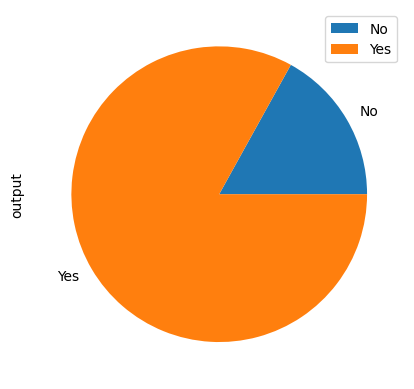

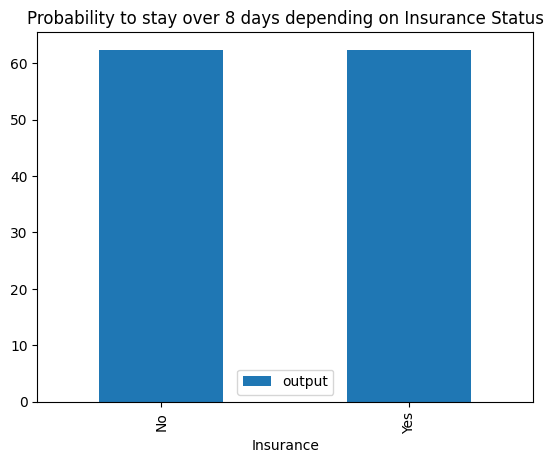

In [13]:
df_insurance = df.groupby('Insurance').count()
df_insurance.plot.pie(y='output')


df_insurance = df.groupby('Insurance').mean()
df_insurance['output'] = df_insurance['output']*100

df_insurance.plot.bar(y='output', title='Probability to stay over 8 days depending on Insurance Status')

# El impacto de esta variable es despreciable en este analisis

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\362428817.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_combo = df.groupby(['Department','Ward_Facility_Code']).mean()


Available Extra Rooms in Hospital  \
Department         Ward_Facility_Code                                      
TB & Chest disease A                                            3.193205   
                   C                                            3.272560   
                   E                                            3.663329   
anesthesia         A                                            3.148344   
                   C                                            3.119874   
                   E                                            3.994530   
gynecology         B                                            3.378993   
                   D                                            3.951809   
                   F                                            3.790362   
radiotherapy       A                                            2.993027   
                   C                                            3.451215   
                   E                                            3.478366   
surgery            A                                            3.498800   

                                       staff_available     patientid  \
Department         Ward_Facility_Code                                  
TB & Chest disease A                          5.018154  64796.400674   
                   C                          4.934622  59160.311234   
                   E                          4.962040  63452.033926   
anesthesia         A                          4.968679  65561.685002   
                   C                          4.938629  59953.492974   
                   E                          4.980831  63139.689332   
gynecology         B                          5.008947  64728.231872   
                   D                          5.020410  62038.852121   
                   F                          5.003629  61707.114497   
radiotherapy       A                          5.034000  65809.095488   
                   C                          5.000671  58104.420212   
                   E                          5.016852  64524.108261   
surgery            A                          6.358445  62898.370921   

                                       Visitors with Patient  \
Department         Ward_Facility_Code                          
TB & Chest disease A                                3.906380   
                   C                                3.637201   
                   E                                4.227256   
anesthesia         A                                3.387534   
                   C                                3.606539   
                   E                                4.009785   
gynecology         B                                3.196989   
                   D                                3.657714   
                   F                                3.499894   
radiotherapy       A                                2.997176   
                   C                                3.674138   
                   E                                3.926209   
surgery            A                                3.418186   

                                       Admission_Deposit  Stay (in days)  \
Department         Ward_Facility_Code                                      
TB & Chest disease A                         4863.510723       21.376297   
                   C                         4470.643075       20.103131   
                   E                         4804.075623       21.089966   
anesthesia         A                         4926.214026       27.394858   
                   C                         4529.084546       27.849441   
                   E                         4808.465266       27.527098   
gynecology         B                         4738.808021        8.659725   
                   D                         4550.465993        8.645302   
                   F                         4794.163048        8.604748   
radiotherapy       A

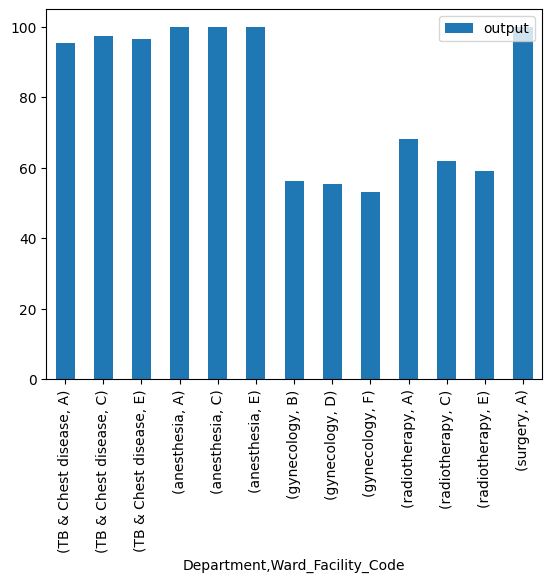

In [14]:
df_combo = df.groupby(['Department','Ward_Facility_Code']).mean()
df_combo['output'] = df_combo['output']*100

df_combo.plot.bar(y='output') #  title='Probability to stay over 8 days by Department and Facility',

df_combo.head(20)
#considerando que el departamento esta ligeramente asociado a la seccion del hospital, revisamos agrupando ambos

# observamos que si bien hay una relación fuerte entre ambas cosas y podriamos considerdad usar solo una de las 
# dos al tener la misma información, pero la disparidad en radioterapia hace que considere retenr ambas variables

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\3669702934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_combo = df.groupby(['Department','gender']).mean()


Available Extra Rooms in Hospital  staff_available  \
Department         gender                                                       
TB & Chest disease Female                           3.541667         4.974771   
                   Male                             3.557443         4.984113   
                   Other                            3.479908         4.905855   
anesthesia         Female                           3.634137         4.940142   
                   Male                             3.612621         4.976941   
                   Other                            3.577493         4.981778   
gynecology         Female                           3.721626         5.011043   
radiotherapy       Female                           3.351064         5.028160   
                   Male                             3.345587         5.015291   
                   Other                            3.397322         5.031926   
surgery            Female                           3.597381         6.304419   
                   Male                             3.487756         6.378397   
                   Other                            3.451389         6.312500   

                              patientid  Visitors with Patient  \
Department         gender                                        
TB & Chest disease Female  63973.625000               4.112385   
                   Male    63603.465210               4.144601   
                   Other   62342.093379               4.053578   
anesthesia         Female  63161.179573               3.791782   
                   Male    63751.878904               3.739864   
                   Other   63906.924109               3.765719   
gynecology         Female  62736.730283               3.462750   
radiotherapy       Female  64071.307572               3.684293   
                   Male    64170.095638               3.667336   
                   Other   64158.362204               3.639959   
surgery            Female  64114.613748               3.397709   
                   Male    62700.176115               3.436095   
                   Other   62633.951389               3.347222   

                           Admission_Deposit  Stay (in days)      output  
Department         gender                                                 
TB & Chest disease Female        4778.825287       21.123471   96.483180  
                   Male          4800.860740       21.094660   96.476905  
                   Other         4795.211643       21.044393   96.670494  
anesthesia         Female        4797.507949       27.721256  100.000000  
                   Male          4825.925396       27.474880  100.000000  
                   Other         4835.541771       27.489387  100.000000  
gynecology         Female        4693.113901        8.635423   54.756858  
radiotherapy       Female        4769.651000       16.235816   61.785565  
                   Male          4768.540230       16.207870   61.632620  
                   Other         4796.180920       16.215551   61.647786  
surgery            Female        4779.702795       30.425532  100.000000  
                   Male          4746.771120       30.847367   99.966454  
                   Other         4770.190900       30.211806   99.826389

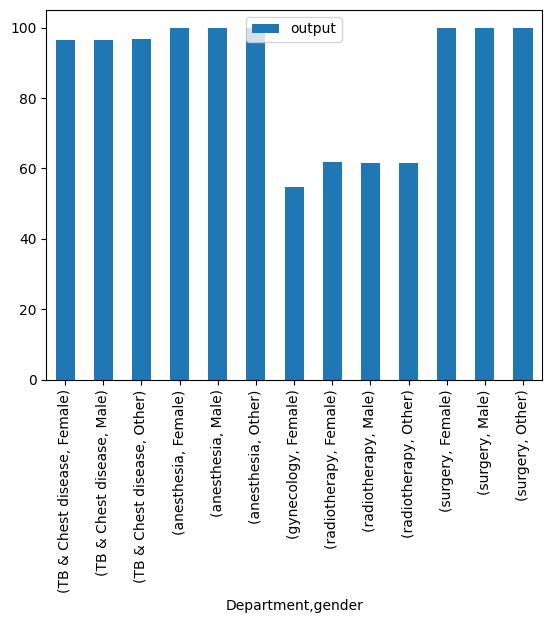

In [15]:
df_combo = df.groupby(['Department','gender']).mean()
df_combo['output'] = df_combo['output']*100

df_combo.plot.bar(y='output') #  title='Probability to stay over 8 days by Department and Facility',

df_combo.head(20)
# en este caso vemos que la informacion que tenemos de si es admitido en ginecologia y si es mujer, puede ser redundante. 
# Se puede considerar no tener en cuenta uno de los dos, en este caso tendria mas sentido no usar genero

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1147601272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_combo = df.groupby(['Department','doctor_name']).mean()


Available Extra Rooms in Hospital  \
Department         doctor_name                                      
TB & Chest disease Dr John                               3.510805   
                   Dr Mark                               3.557443   
anesthesia         Dr John                               3.606006   
                   Dr Mark                               3.612621   
gynecology         Dr Nathan                             3.699015   
                   Dr Olivia                             3.736902   
                   Dr Sarah                              3.730478   
                   Dr Sophia                             3.710418   
radiotherapy       Dr John                               3.374339   
                   Dr Sam                                3.345587   
surgery            Dr Isaac                              3.487756   
                   Dr Simon                              3.526537   

                                staff_available     patientid  \
Department         doctor_name                                  
TB & Chest disease Dr John             4.940333  63158.327214   
                   Dr Mark             4.984113  63603.465210   
anesthesia         Dr John             4.960819  63531.530430   
                   Dr Mark             4.976941  63751.878904   
gynecology         Dr Nathan           4.981732  63297.910940   
                   Dr Olivia           5.014815  62543.177259   
                   Dr Sarah            5.022079  62641.818197   
                   Dr Sophia           5.022332  62544.254471   
radiotherapy       Dr John             5.030055  64115.110063   
                   Dr Sam              5.015291  64170.095638   
surgery            Dr Isaac            6.378397  62700.176115   
                   Dr Simon            6.308340  63396.112047   

                                Visitors with Patient  Admission_Deposit  \
Department         doctor_name                                             
TB & Chest disease Dr John                   4.082999        4787.013765   
                   Dr Mark                   4.144601        4800.860740   
anesthesia         Dr John                   3.778839        4816.396265   
                   Dr Mark                   3.739864        4825.925396   
gynecology         Dr Nathan                 3.479089        4679.613720   
                   Dr Olivia                 3.476229        4700.323581   
                   Dr Sarah                  3.441048        4696.065524   
                   Dr Sophia                 3.454289        4692.772860   
radiotherapy       Dr John                   3.661986        4782.999820   
                   Dr Sam                    3.667336        4768.540230   
surgery            Dr Isaac                  3.436095        4746.771120   
                   Dr Simon                  3.373210        4775.087082   

                                Stay (in days)      output  
Department         doctor_name                              
TB & Chest disease Dr John           21.083955   96.576783  
                   Dr Mark           21.094660   96.476905  
anesthesia         Dr John           27.606106  100.000000  
                   Dr Mark           27.474880  100.000000  
gynecology         Dr Nathan          8.610262   53.384419  
                   Dr Olivia          8.636746   55.048958  
                   Dr Sarah           8.659159   55.752887  
                   Dr Sophia          8.627655   54.416188  
radiotherapy       Dr John           16.225619   61.716240  
                   Dr Sam            16.207870   61.632620  
surgery            Dr Isaac          30.847367   99.966454  
                   Dr Simon          30.321820   99.915754

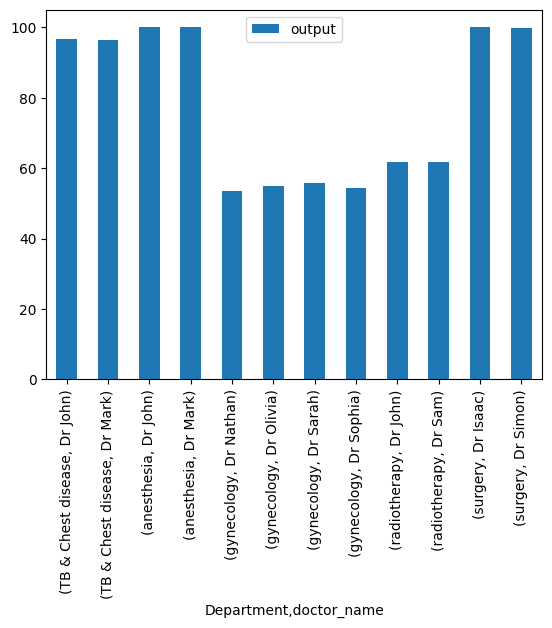

In [16]:
df_combo = df.groupby(['Department','doctor_name']).mean()
df_combo['output'] = df_combo['output']*100

df_combo.plot.bar(y='output') #  title='Probability to stay over 8 days by Department and Facility',

# de aqui podemos concluir que la informacion que nos da el nombre del doctor, ya la tenemos en el departemento de admision

df_combo.head(20)

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\2256669177.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dr = df.groupby('doctor_name').mean()


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Atending Dr'}, xlabel='doctor_name'>

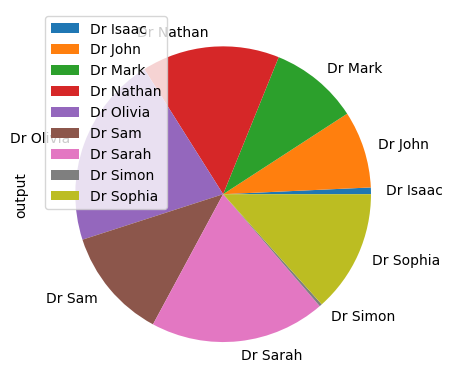

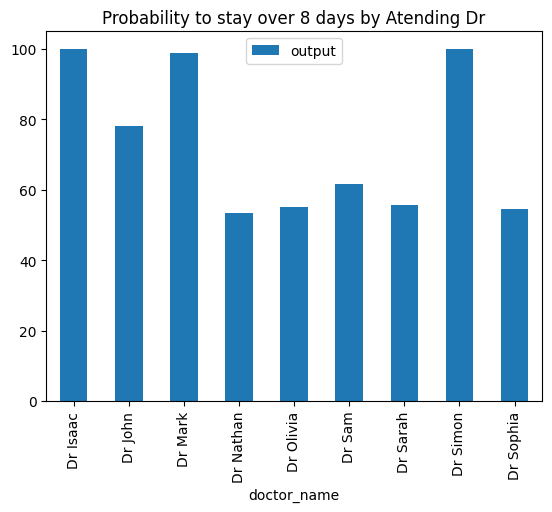

In [17]:
df_dr = df.groupby('doctor_name').count()
df_dr.plot.pie(y='output')

df_dr = df.groupby('doctor_name').mean()

df_dr['output'] = df_dr['output']*100

df_dr.plot.bar(y='output', title='Probability to stay over 8 days by Atending Dr')

# Se puede observar que el doctor que atiende tiene una influencia en la variable objetivo. 
# En este caso podemos agrupar los doctores en 3 grupos dependiendo de su influencia. 

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\2563328531.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_age = dfg.groupby('Age').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Age,,,,,,,
11-20,3.549782,5.039037,62795.060501,3.362269,4744.502093,8.686643,56.683896
21-30,3.598354,5.007000,62632.316844,3.400308,4739.087421,8.628553,54.365952
31-40,3.945211,5.001562,62405.920851,3.524143,4637.145463,8.618774,54.438772
41-50,3.795786,5.015359,63518.361988,3.598638,4629.115560,8.640783,54.777248


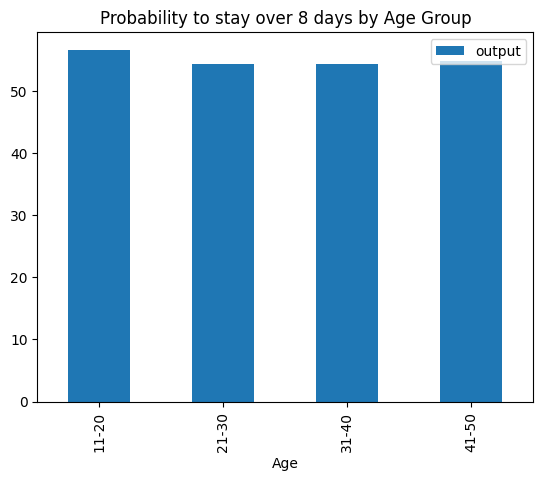

In [18]:
dfg = df[df['Department'] == 'gynecology']

df_age = dfg.groupby('Age').mean()
df_age['output'] = df_age['output']*100

df_age.plot.bar(y='output', title='Probability to stay over 8 days by Age Group')

df_age.head(20)


C:\Users\helio\AppData\Local\Temp\ipykernel_9320\3326171136.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dr = dfg.groupby('doctor_name').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
doctor_name,,,,,,,
Dr Nathan,3.699015,4.981732,63297.910940,3.479089,4679.613720,8.610262,53.384419
Dr Olivia,3.736902,5.014815,62543.177259,3.476229,4700.323581,8.636746,55.048958
Dr Sarah,3.730478,5.022079,62641.818197,3.441048,4696.065524,8.659159,55.752887
Dr Sophia,3.710418,5.022332,62544.254471,3.454289,4692.772860,8.627655,54.416188


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Atending Dr'}, xlabel='doctor_name'>

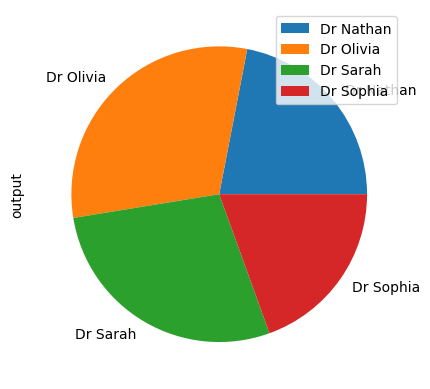

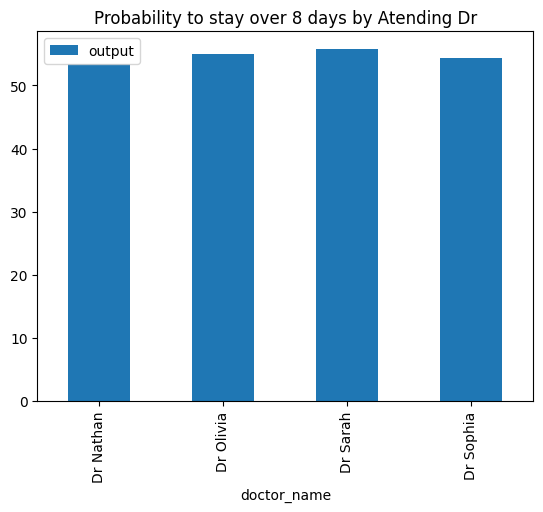

In [19]:
df_dr = dfg.groupby('doctor_name').count()
df_dr.plot.pie(y='output')

df_dr = dfg.groupby('doctor_name').mean()

df_dr['output'] = df_dr['output']*100
display(df_dr.head(6))
df_dr.plot.bar(y='output', title='Probability to stay over 8 days by Atending Dr')

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\4213036274.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_conditions = dfg.groupby('health_conditions').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
health_conditions,,,,,,,
Asthama,3.701394,5.029244,62594.194595,3.477527,4692.931770,8.655526,55.819984
Diabetes,3.704157,5.018173,62676.878008,3.456245,4694.253760,8.625895,54.226333
Heart disease,3.727633,5.033764,62179.641720,3.448910,4688.701521,8.632493,54.938145
High Blood Pressure,3.753414,5.016428,62679.376877,3.412279,4698.536981,8.662024,55.699970
None,3.722482,5.005826,62813.049470,3.504462,4687.344907,8.619478,54.074216
Other,3.718605,4.992530,62938.113037,3.430074,4699.246675,8.636544,54.842606


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Health Conditions'}, xlabel='health_conditions'>

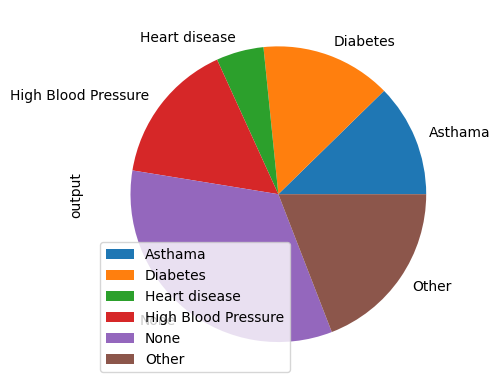

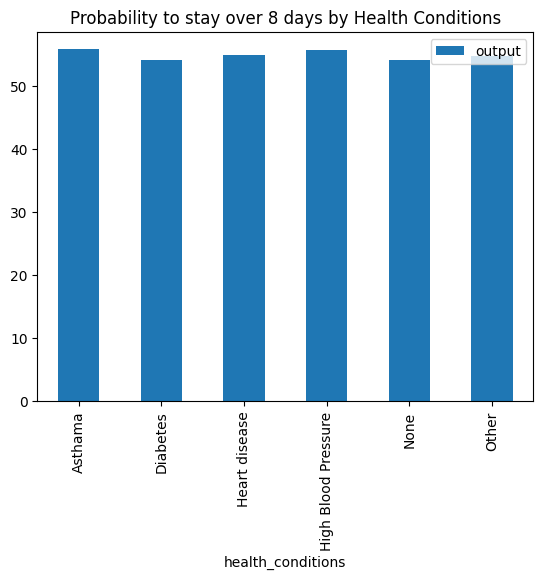

In [20]:
df_conditions = dfg.groupby('health_conditions').count()
df_conditions.plot.pie(y='output')

df_conditions = dfg.groupby('health_conditions').mean()
df_conditions['output'] = df_conditions['output']*100
display(df_conditions.head(6))
df_conditions.plot.bar(y='output', title='Probability to stay over 8 days by Health Conditions')

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\2044043422.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ward = dfg.groupby('Ward_Facility_Code').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Ward_Facility_Code,,,,,,,
B,3.378993,5.008947,64728.231872,3.196989,4738.808021,8.659725,56.208668
D,3.951809,5.020410,62038.852121,3.657714,4550.465993,8.645302,55.262618
F,3.790362,5.003629,61707.114497,3.499894,4794.163048,8.604748,53.007469


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Department'}, xlabel='Ward_Facility_Code'>

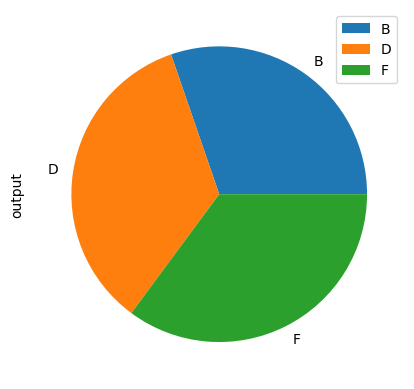

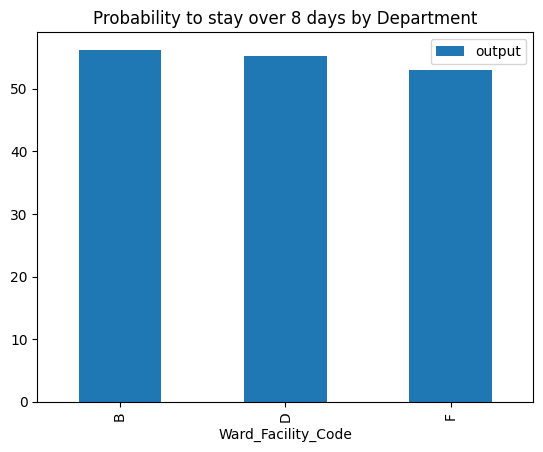

In [21]:
df_ward = dfg.groupby('Ward_Facility_Code').count()
df_ward.plot.pie(y='output')

df_ward = dfg.groupby('Ward_Facility_Code').mean()
df_ward['output'] = df_ward['output']*100
display(df_ward.head(6))
df_ward.plot.bar(y='output', title='Probability to stay over 8 days by Department')

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1972111923.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_admision = dfg.groupby('Type of Admission').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Type of Admission,,,,,,,
Emergency,3.728104,5.022261,60403.394645,3.544019,4669.781669,8.639677,55.872070
Trauma,3.652400,5.006370,63904.176093,3.435857,4700.673246,8.630104,54.316215
Urgent,4.120119,5.008191,62154.001111,3.400236,4712.034456,8.655676,54.329643


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Admision type'}, xlabel='Type of Admission'>

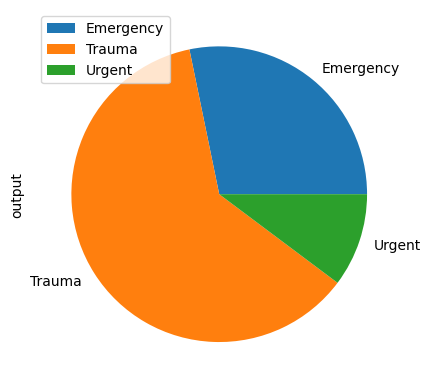

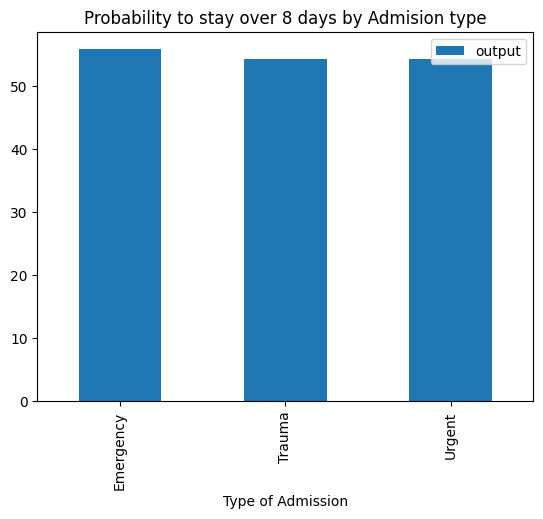

In [22]:
df_admision = dfg.groupby('Type of Admission').count()
df_admision.plot.pie(y='output')


df_admision = dfg.groupby('Type of Admission').mean()
df_admision['output'] = df_admision['output']*100
display(df_admision.head(6))
df_admision.plot.bar(y='output', title='Probability to stay over 8 days by Admision type')

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1612109728.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_severity = dfg.groupby('Severity of Illness').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Severity of Illness,,,,,,,
Extreme,3.471441,5.007509,64167.955605,3.391092,4640.681395,8.624196,54.008151
Minor,3.791879,4.996132,62745.884354,3.444161,4734.399879,8.601426,52.975453
Moderate,3.763736,5.020042,62278.601470,3.495269,4687.901210,8.656946,55.935424


<AxesSubplot: title={'center': 'Probability to stay over 8 days by Severity of Ilness'}, xlabel='Severity of Illness'>

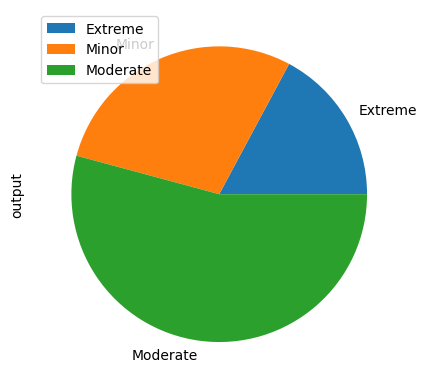

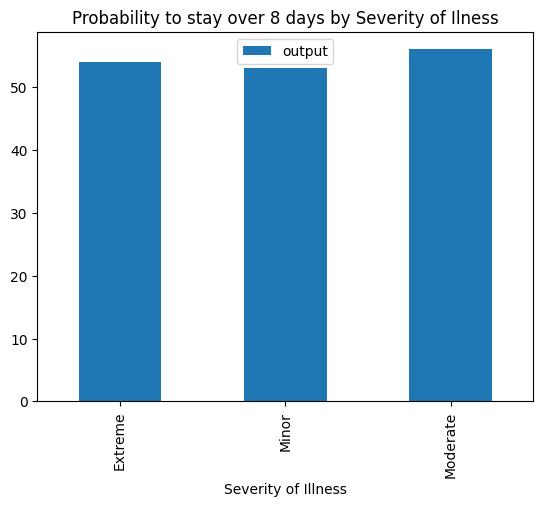

In [23]:
df_severity = dfg.groupby('Severity of Illness').count()
df_severity.plot.pie(y='output')

df_severity = dfg.groupby('Severity of Illness').mean()
df_severity['output'] = df_severity['output']*100
display(df_severity.head(6))
df_severity.plot.bar(y='output', title='Probability to stay over 8 days by Severity of Ilness')


C:\Users\helio\AppData\Local\Temp\ipykernel_9320\163422645.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_insurance = dfg.groupby('Insurance').mean()


,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),output
Insurance,,,,,,,
No,3.704828,4.996617,62415.896959,3.371606,4688.503678,8.640945,54.895163
Yes,3.725067,5.013998,62802.455949,3.481422,4694.058347,8.634292,54.728524


<AxesSubplot: title={'center': 'Probability to stay over 8 days depending on Insurance Status'}, xlabel='Insurance'>

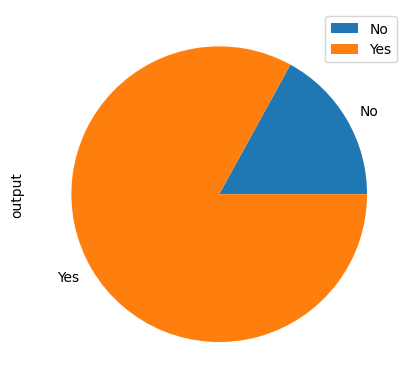

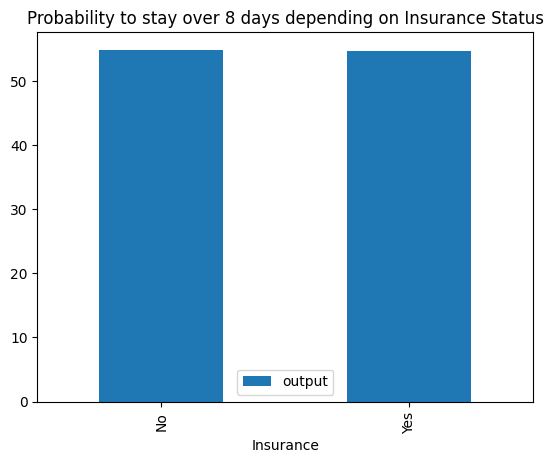

In [24]:
df_insurance = dfg.groupby('Insurance').count()
df_insurance.plot.pie(y='output')


df_insurance = dfg.groupby('Insurance').mean()
df_insurance['output'] = df_insurance['output']*100
display(df_insurance.head(6))
df_insurance.plot.bar(y='output', title='Probability to stay over 8 days depending on Insurance Status')

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\3488898909.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfg.corr()


<AxesSubplot: >

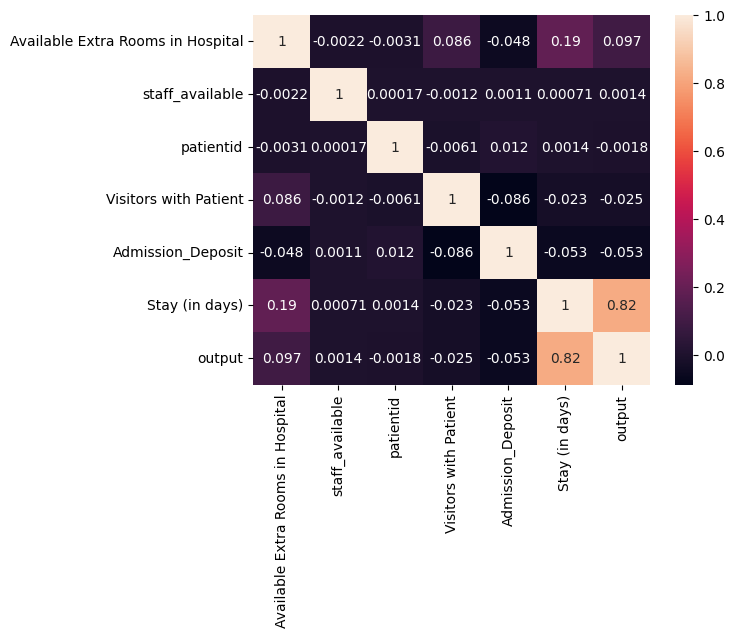

In [25]:
import seaborn as sns
corr = dfg.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

En resumen, las variables que tienen un impacto fuerte en la variable objetivo son: 
+ Genero
+ Departamento
+ Sección
+ Rango Etario
+ Dr que atiende 

Adicionalemente, la sección solo influyé fuertemente para el departamento de radiotherapy 

Iniciamos los cambios en el Dataframe, primero codificando Genero

In [26]:
df_train = df[['Department','gender','Ward_Facility_Code', 'Age', 'Available Extra Rooms in Hospital', 
               'staff_available', 'Admission_Deposit','Severity of Illness' , 'doctor_name',
               'Stay (in days)', 'output']] # 'gender',


# Como vimos anteriormente, el genero que tiene impacto en la variable objetivo es 'Female'. Los otros dos no tienen distincion en su impacto entre ellos. 
# en este caso, solo tomo 'Female' como 1 y cualquier otro como 0

#df_train['gender'] = df_train.gender.map(lambda x: 1 if x == 'Female' else 0)

# def uncode_gender(gender): # Creamos funcion para decodificar ya que la hicimos a mano
   
#     if gender == 1:
#         return 'Female'
#     else:
#         return 'Male or Other'


df_train.head(10)


,Department,gender,Ward_Facility_Code,Age,Available Extra Rooms in Hospital,staff_available,Admission_Deposit,Severity of Illness,doctor_name,Stay (in days),output
0,gynecology,Female,D,41-50,4,0,2966.408696,Extreme,Dr Sophia,8,0
1,gynecology,Female,B,31-40,4,2,3554.835677,Minor,Dr Sophia,9,1
2,gynecology,Female,B,21-30,2,8,5624.733654,Extreme,Dr Sophia,7,0
3,gynecology,Female,D,31-40,4,7,4814.149231,Moderate,Dr Olivia,8,0
4,anesthesia,Male,E,71-80,2,10,5169.269637,Moderate,Dr Mark,34,1
5,gynecology,Female,F,21-30,2,2,4539.268397,Moderate,Dr Olivia,11,1
6,gynecology,Female,D,31-40,7,5,4669.961786,Moderate,Dr Olivia,8,0
7,gynecology,Female,B,21-30,3,8,5101.675480,Moderate,Dr Sophia,7,0
8,TB & Chest disease,Other,A,31-40,2,7,4899.767616,Moderate,Dr John,12,1
9,gynecology,Female,D,41-50,4,7,3350.366777,Extreme,Dr Sarah,8,0


Ahora procedemos a cambiar Department y Ward_Facility_code combiandolos

In [27]:

#Observamos que hay seis categorias grandes dentro de estas dos features:

# - Si esta en Cirugia o Anestesiologia ->5
# - Si esta en TB & Chest disease -> 4
# - si en radio terapia y edificio A -> 3
# - si esta en terapia y edificio C -> 2
# - si esta en terapia y edificio E -> 1
# - si esta en gynecology -> 0


# Creamos codificamos y creamos funcion para decodificar ya que la hicimos a mano

# dw = []

# for ind in df_train.index:
#     if ((df_train.loc[ind, 'Department'] == 'surgery') or (df_train.loc[ind, 'Department'] == 'anesthesia')):
#         dw.insert(ind,5)
#     elif df_train.loc[ind, 'Department'] == 'TB & Chest disease':
#         dw.insert(ind,4)
#     elif ((df_train.loc[ind, 'Department'] == 'radiotherapy') & (df_train.loc[ind, 'Ward_Facility_Code'] == 'A')):
#         dw.insert(ind,3)
#     elif ((df_train.loc[ind, 'Department'] == 'radiotherapy') & (df_train.loc[ind, 'Ward_Facility_Code'] == 'C')):
#         dw.insert(ind,2)
#     elif ((df_train.loc[ind, 'Department'] == 'radiotherapy') & (df_train.loc[ind, 'Ward_Facility_Code'] == 'E')):
#         dw.insert(ind,1) 
#     elif df_train.loc[ind, 'Department'] == 'gynecology':
#         dw.insert(ind,0)
#     else:
#         print(df_train.loc[ind, 'Department'], df_train.loc[ind, 'Ward_Facility_Code'])

# def uncode_depward(depward):
#     if depward == 0:
#         return 'gynecology'
#     elif depward == 1:
#         return 'radiotherapy ward E'
#     elif depward == 2:
#         return 'radiotherapy ward C'
#     elif depward == 3:
#         return 'radiotherapy ward A'
#     elif depward == 4:
#         return 'TB & Chest disease'
#     elif depward == 4:
#         return 'surgery or anesthesia'


# df_train['depward'] = dw

# df_train.drop(['Department', 'Ward_Facility_Code'], axis = 1, inplace=True)

from sklearn import preprocessing
le = preprocessing.OrdinalEncoder()
# df_train['Department'] = le.fit_transform([df_train['Department']])
# df_train['Ward_Facility_Code'] = le.fit_transform([df_train['Ward_Facility_Code']])
# df_train['Severity of Illness'] = le.fit_transform([df_train['Severity of Illness']])
# df_train['doctor_name'] = le.fit_transform([df_train['doctor_name']])
# df_train['Age'] = le.fit_transform([df_train['Age']])
df_train[['gender','Department','Ward_Facility_Code', 
'Severity of Illness', 'doctor_name','Age']] = le.fit_transform(df_train[['gender','Department','Ward_Facility_Code',
 'Severity of Illness', 'doctor_name','Age']])

df_train.head(10)

C:\Users\helio\AppData\Local\Temp\ipykernel_9320\1859878398.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['gender','Department','Ward_Facility_Code',


,Department,gender,Ward_Facility_Code,Age,Available Extra Rooms in Hospital,staff_available,Admission_Deposit,Severity of Illness,doctor_name,Stay (in days),output
0,2.0,0.0,3.0,4.0,4,0,2966.408696,0.0,8.0,8,0
1,2.0,0.0,1.0,3.0,4,2,3554.835677,1.0,8.0,9,1
2,2.0,0.0,1.0,2.0,2,8,5624.733654,0.0,8.0,7,0
3,2.0,0.0,3.0,3.0,4,7,4814.149231,2.0,4.0,8,0
4,1.0,1.0,4.0,7.0,2,10,5169.269637,2.0,2.0,34,1
5,2.0,0.0,5.0,2.0,2,2,4539.268397,2.0,4.0,11,1
6,2.0,0.0,3.0,3.0,7,5,4669.961786,2.0,4.0,8,0
7,2.0,0.0,1.0,2.0,3,8,5101.675480,2.0,8.0,7,0
8,0.0,2.0,0.0,3.0,2,7,4899.767616,2.0,1.0,12,1
9,2.0,0.0,3.0,4.0,4,7,3350.366777,0.0,6.0,8,0


Ahora vamos a codificar la edad en 3 categorias:
 + Menores de 10 y tercera edad (2)
 + entre 11 y 30 (0)
 +  Entre 30 y 50 (1)

In [28]:
# a = []

# for ind in df_train.index:
#     if df_train.loc[ind,'Age'] in ['0-10', '51-60', '61-70','71-80', '81-90', '91-100']:
#         a.insert(ind,2)
#     elif df_train.loc[ind,'Age'] in ['11-20', '21-30']:
#         a.insert(ind,1)
#     elif df_train.loc[ind,'Age'] in ['31-40','41-50']:
#         a.insert(ind,0)
#     else:
#         print(df_train.loc[ind,'Age'])

# def uncode_age(age):
#     if age == 0:
#         return '31-50'
#     if age == 1:
#          return '11-30'
#     if age == 1:
#         return '0-10 or 50+'

# df_train['agecode'] = a

# df_train.drop('Age', inplace=True, axis=1)

# df_train = df_train[['depward', 'agecode', 'Available Extra Rooms in Hospital', 'staff_available',
#  'Admission_Deposit', 'Stay (in days)', 'output']]



df_train.head()


,Department,gender,Ward_Facility_Code,Age,Available Extra Rooms in Hospital,staff_available,Admission_Deposit,Severity of Illness,doctor_name,Stay (in days),output
0,2.0,0.0,3.0,4.0,4,0,2966.408696,0.0,8.0,8,0
1,2.0,0.0,1.0,3.0,4,2,3554.835677,1.0,8.0,9,1
2,2.0,0.0,1.0,2.0,2,8,5624.733654,0.0,8.0,7,0
3,2.0,0.0,3.0,3.0,4,7,4814.149231,2.0,4.0,8,0
4,1.0,1.0,4.0,7.0,2,10,5169.269637,2.0,2.0,34,1


<AxesSubplot: >

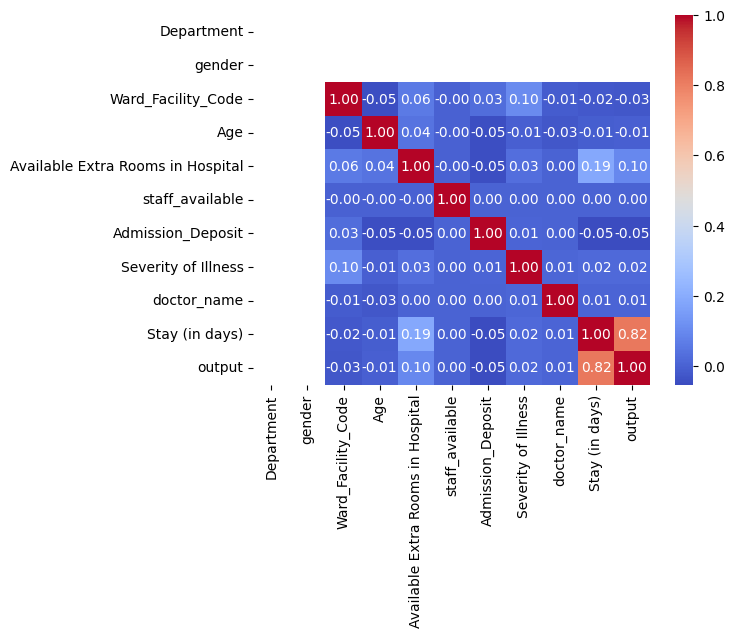

In [29]:
import seaborn as sns
corr = df_train[df_train['Department']==2].corr()
sns.heatmap(corr, 
        annot=True, 
        cmap= 'coolwarm',  fmt= '.2f')



In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

#sns.pairplot(df_train, diag_kind='kde', hue= 'output')
#plt.show()



In [31]:
df_train.drop(['staff_available'], axis=1, inplace=True)



C:\Users\helio\AppData\Local\Temp\ipykernel_9320\502218474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['staff_available'], axis=1, inplace=True)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df_train['output'], test_size=0.30, 
                                                    random_state=42, stratify=df_train['output'])


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Instanciamos un objeto de la clase DecisionTreeClassifier

criterion = ['gini', 'entropy', 'log_loss']
max_depth = [6,8,12,16, 17, 18, 19, 20, 21, 22]
mins = list(range(2,6))


parameters = dict(   criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=mins)

clf = DecisionTreeClassifier() 

model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)

# y_test = [1 if i>8 else 0 for i in y_test ]
# y_pred = [1 if i>8 else 0 for i in y_pred]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 2}
Mejor Score: 0.7525470383275261

[[29836 16539]
 [13695 62930]]
0.7541951219512195
[0.64336388 0.82127243]
[0.68539661 0.79188111]


c:\Users\helio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df_train['Stay (in days)'], test_size=0.30, 
                                                    random_state=42, stratify=df_train['output'])

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = linear_model.predict(X_train)
y_pred= linear_model.predict(X_test)

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

print("Coeficiente de determinación r2 de la regresión múltiple en entrenamiento", r2_score(y_train, linear_model.predict(X_train)))
print("Coeficiente de determinación r2 de la regresión múltiple en test", r2_score(y_test, linear_model.predict(X_test)))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Coeficiente de determinación r2 de la regresión múltiple en entrenamiento", r2_score(y_train_pred, linear_model.predict(X_train)))
print("Coeficiente de determinación r2 de la regresión múltiple en test", r2_score(y_test_pred, linear_model.predict(X_test)))

y_test = [1 if i>8 else 0 for i in y_test ]
y_pred = [1 if i>8 else 0 for i in y_pred]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))


Las pendientes del modelo de regresión lineal son: [-2.11224154e+00  5.00900606e+00 -2.77816820e-01  1.76552844e+00
  2.07435790e-02  1.45717148e-04  1.47311417e-01 -5.35146628e-01]
La ordenada al origen del modelo de regresión lineal es: 11.76140255801219
Coeficiente de determinación r2 de la regresión múltiple en entrenamiento 0.5282863159935909
Coeficiente de determinación r2 de la regresión múltiple en test 0.520671123828043
Coeficiente de determinación r2 de la regresión múltiple en entrenamiento 1.0
Coeficiente de determinación r2 de la regresión múltiple en test -7225.1493095938085
[[ 9147 37228]
 [11676 64949]]
0.6024065040650407
[0.19723989 0.84762153]
[0.43927388 0.63565186]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df_train['Stay (in days)'], test_size=0.30, 
                                                    random_state=42, stratify=df_train['output'])

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures((2,3), include_bias=False)

poly.fit(X_test, y_test)

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

print(X_train_new.shape, X_test_new.shape)

reg_2 = LinearRegression()

reg_2.fit(X_train_new, y_train)

y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)


y_test = [1 if i>8 else 0 for i in y_test ]
y_pred = [1 if i>8 else 0 for i in y_test_pred_2]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

(287000, 156) (123000, 156)
[[ 5947 40428]
 [ 6510 70115]]
0.618390243902439
[0.1282372  0.91504078]
[0.47740226 0.63427806]


In [37]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df_train['output'], test_size=0.30, 
                                                    random_state=42, stratify=df_train['output'])


from sklearn.neighbors import KNeighborsClassifier

algorithms = ['auto', 'kd_tree', 'ball_tree', 'brute']
weightss = ['uniform']
neighborss = list(range(9,16))
leaf_sizes = [16, 17, 18, 19, 20]
ps= [1,2]

parameters = dict(algorithm = algorithms,
                  n_neighbors= neighborss,
                  weights = weightss,
                  leaf_size = leaf_sizes,
                  p = ps,
                  n_jobs = [-1]
                      )

clf = KNeighborsClassifier()

model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)

# y_test = [1 if i>8 else 0 for i in y_test ]
# y_pred = [1 if i>8 else 0 for i in y_pred]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

KeyboardInterrupt: 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['output', 'Stay (in days)'], axis =1), 
                                                    df_train['Stay (in days)'], test_size=0.30, 
                                                    random_state=42, stratify=df_train['output'])



penaltys = ['l2']
duals = [True, False]
Cs= [1.0, 0.95, 0.9]
fit_intercepts = [True, False]
ps= [1,2]
random_states = [42]

parameters = dict(penalty = penaltys,
                  dual = duals,
                  C= Cs,
                  fit_intercept = fit_intercepts,
                  p= ps,
                  random_state = random_states
                      )


clf = LogisticRegression()


model = GridSearchCV(clf, parameters)
model.fit(X_train, y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


y_pred = model.predict(X_test.values)

y_test = [1 if i>8 else 0 for i in y_test ]
y_pred = [1 if i>8 else 0 for i in y_pred]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))